# Optimization

- Local optimization of smooth function
- Global optimization of smooth function
- Optimization of nonsmooth function

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize, differential_evolution

## Local optimization of smooth function

Consider a function $f$ at the interval $[1, 30]$.

In [2]:
def f(x):
    return np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-x / 2)

In [3]:
x = np.arange(1, 30.5, 0.5)

In order to find local minimum of the smooth function will use BFGS method that is based on finding gradient.

Let's run this method from initial values 2 and 30.

In [4]:
a = minimize(f, 2, method='BFGS')
b = minimize(f, 30, method='BFGS')
b

      fun: -11.898894665981322
 hess_inv: array([[1.67940841]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([25.880193])

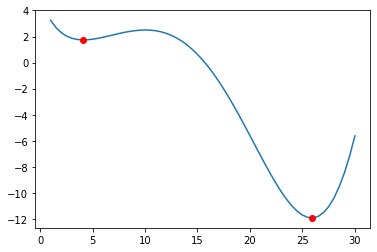

In [5]:
plt.plot(x, f(x), a.x, a.fun, 'ro', b.x, b.fun, 'ro')
plt.show()

In [6]:
out = open('task1', 'w')
out.write("%.2f" % a.fun + ' ' + "%.2f" % b.fun)
out.close()

In [7]:
!cat 'task1'

1.75 -11.90

## Global optimization

In order to find global minimum of smooth function wiil use differential evolution stochastic method.

In [8]:
c = differential_evolution(f, [(1,30)])
c

     fun: array([-11.89889467])
     jac: array([2.84217094e-06])
 message: 'Optimization terminated successfully.'
    nfev: 96
     nit: 5
 success: True
       x: array([25.88019769])

nfev - number of computations of function. \
DE as compared with BFGS has much more nfev.

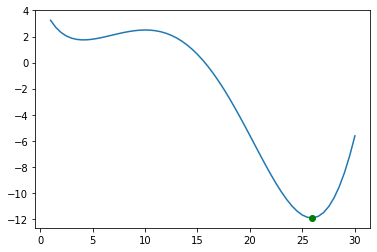

In [9]:
plt.plot(x, f(x), c.x, c.fun, 'go')
plt.show()

In [10]:
out = open('task2', 'w')
out.write("%.2f" % c.fun)
out.close()

In [11]:
!cat 'task2'

-11.90

## Optimization of nonsmooth function

Consider a nonsmooth function $h$ at the interval $[1, 30]$.

In [12]:
def h_(x):
    return int(f(x))

In [13]:
h = np.vectorize(h_)

Let's try to find the minimum by two ways described above.

In [14]:
d = minimize(h, 30, method='BFGS')
e = differential_evolution(h, [(1,30)])

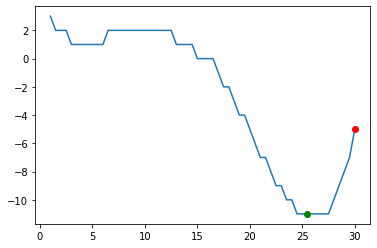

In [15]:
plt.plot(x, h(x), d.x, d.fun, 'ro', e.x, e.fun, 'go')
plt.show()

The first way to find the minimum did not work, since it uses a gradient.

In [16]:
out = open('task3', 'w')
out.write("%.2f" % d.fun + ' ' + "%.2f" % e.fun)
out.close()

In [17]:
!cat 'task3'

-5.00 -11.00